In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore");

In [2]:
df = pd.read_csv('subscribe_data.csv', sep = ';')

In [3]:
display(df.head())
display(df.tail())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,34,entrepreneur,married,high.school,unknown,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
1,42,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,mon,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
2,30,blue-collar,married,basic.4y,no,yes,no,cellular,apr,mon,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
3,33,services,married,high.school,no,unknown,unknown,cellular,aug,thu,...,2,999,0,nonexistent,-2.9,92.201,-31.4,0.873,5076.2,no
4,36,admin.,married,university.degree,unknown,yes,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20589,28,technician,married,high.school,unknown,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
20590,34,admin.,single,high.school,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
20591,32,admin.,single,professional.course,no,no,no,cellular,may,thu,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no
20592,43,entrepreneur,married,basic.9y,unknown,yes,no,cellular,jul,mon,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
20593,38,self-employed,married,basic.9y,unknown,no,no,telephone,jun,mon,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no


In [4]:
df.info()
# Apparently, there are no missing values.
# But if we dig deeper, we see that in many vategorical columns, the value 'unknown' is present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             20594 non-null  int64  
 1   job             20594 non-null  object 
 2   marital         20594 non-null  object 
 3   education       20594 non-null  object 
 4   default         20594 non-null  object 
 5   housing         20594 non-null  object 
 6   loan            20594 non-null  object 
 7   contact         20594 non-null  object 
 8   month           20594 non-null  object 
 9   day_of_week     20594 non-null  object 
 10  duration        20594 non-null  int64  
 11  campaign        20594 non-null  int64  
 12  pdays           20594 non-null  int64  
 13  previous        20594 non-null  int64  
 14  poutcome        20594 non-null  object 
 15  emp.var.rate    20594 non-null  float64
 16  cons.price.idx  20594 non-null  float64
 17  cons.conf.idx   20594 non-null 

In [9]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.describe()

Data Vizualisation

In [49]:
# Functions

def visualisation_cat_variable(col) :
    sns.countplot(y = df[col], hue = df['y'])
    plt.title(f'{col} distribution among bank client');

Bank client data

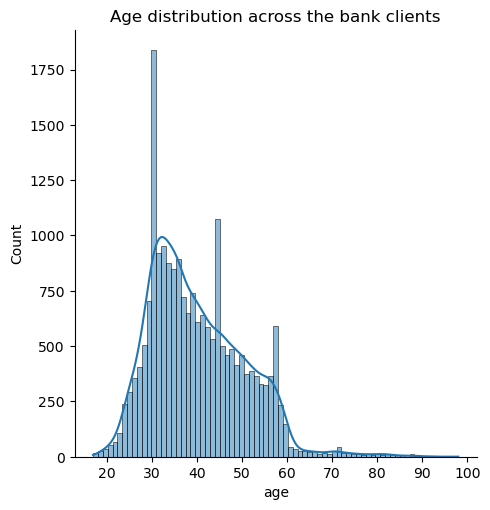

In [17]:
# Age distribution
sns.displot(df.age, kind = 'hist', kde = True)
plt.title('Age distribution across the bank clients');

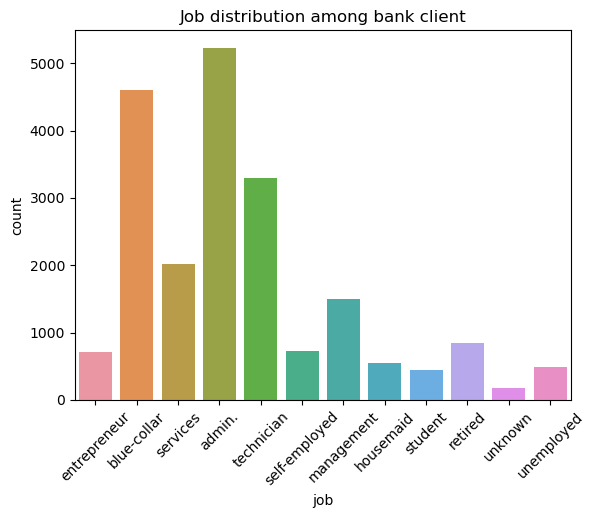

In [21]:
# Job distribution
sns.countplot(x = df['job'])
plt.xticks(rotation = 45)
plt.title('Job distribution among bank client');

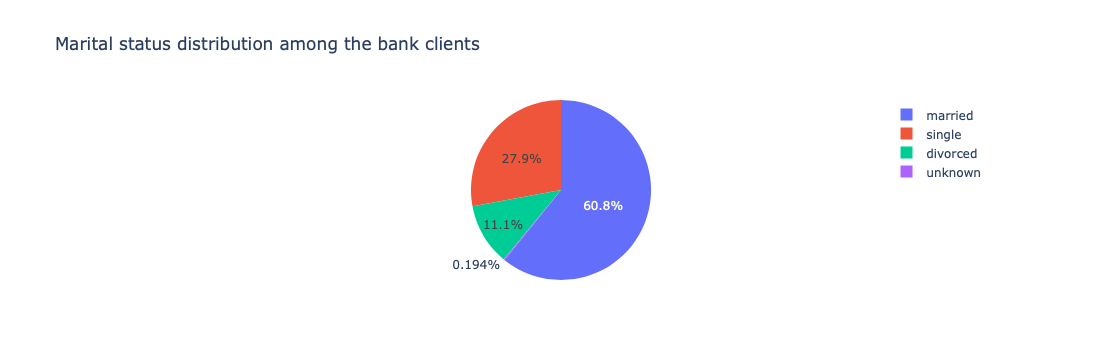

In [35]:
# Marital status distribution - pie chart
counts = df['marital'].value_counts()

fig = px.pie(
    names=counts.index,  
    values=counts.values, 
    title="Marital status distribution among the bank clients")
fig.show()

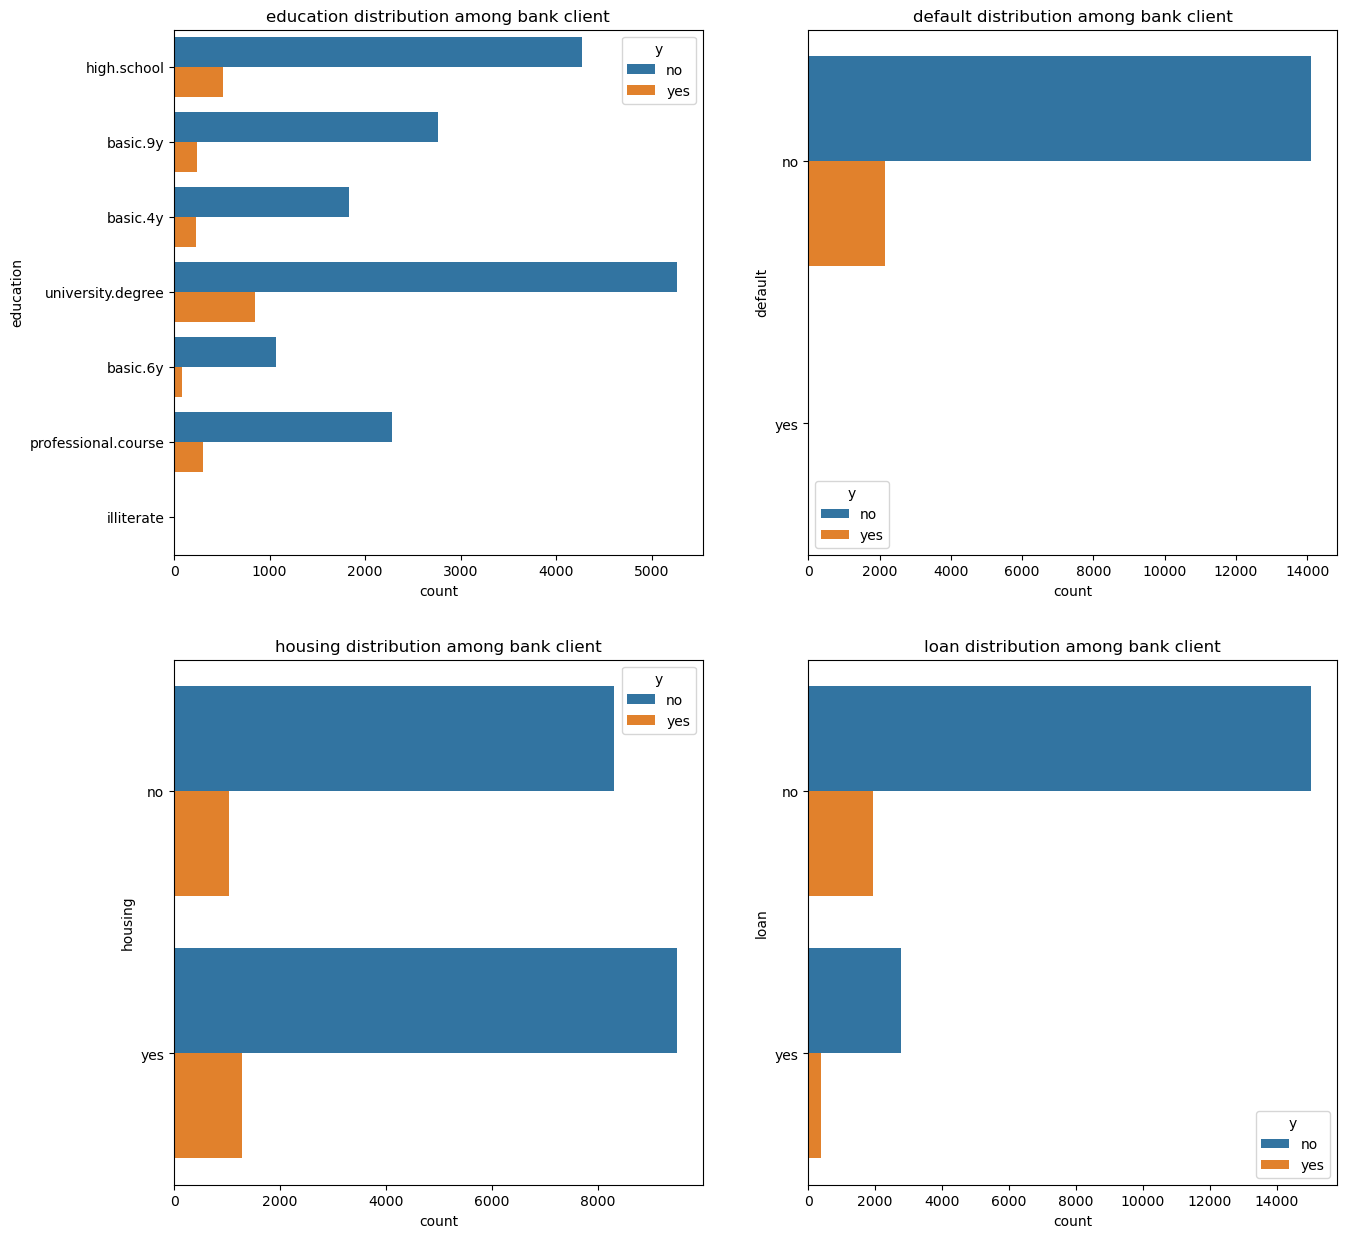

In [77]:
plt.figure(figsize = (15, 15))
j = 1
for i in ['education', 'default', 'housing', 'loan'] :
    plt.subplot(2,2,j)
    visualisation_cat_variable(i)
    j += 1

Related with the last contact of the current campagin

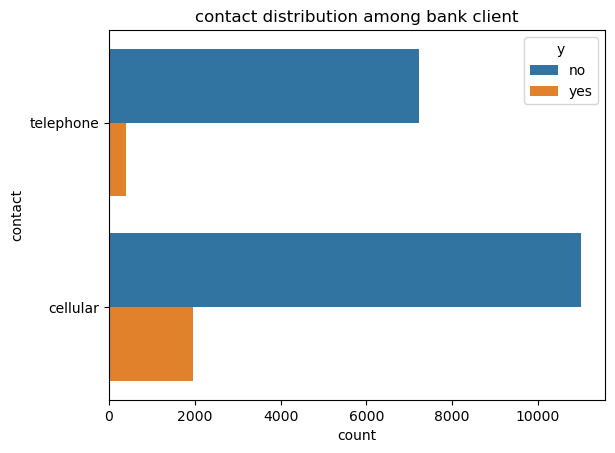

In [82]:
visualisation_cat_variable('contact')

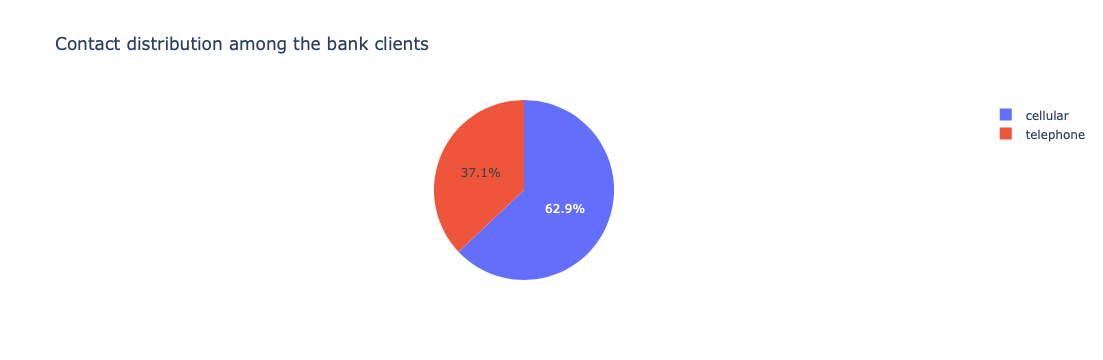

In [43]:
counts = df['contact'].value_counts()

fig = px.pie(
    names=counts.index,  
    values=counts.values,
    title="Contact distribution among the bank clients")
fig.show()

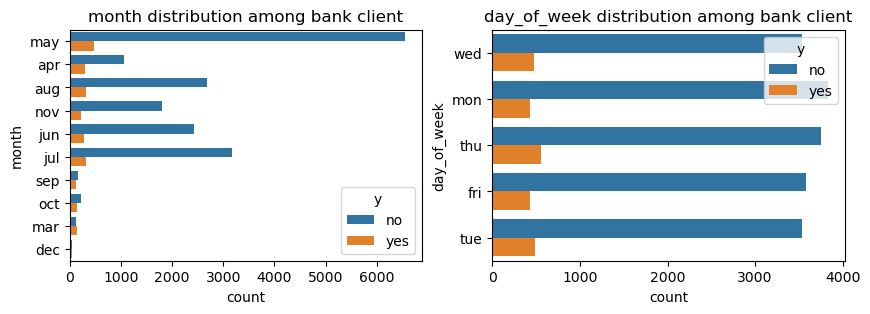

In [59]:
# month and day of the week distribution
plt.figure(figsize = (10,3))
j = 1
for i in ['month', 'day_of_week'] :
    plt.subplot(1,2,j)
    visualisation_cat_variable(i)
    j += 1

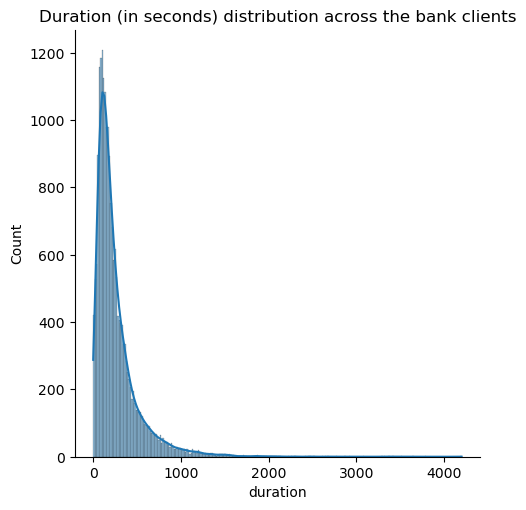

In [86]:
# Duration distribution
sns.displot(df.duration, kind = 'hist', kde = True)
plt.title('Duration (in seconds) distribution across the bank clients');

Other attributes

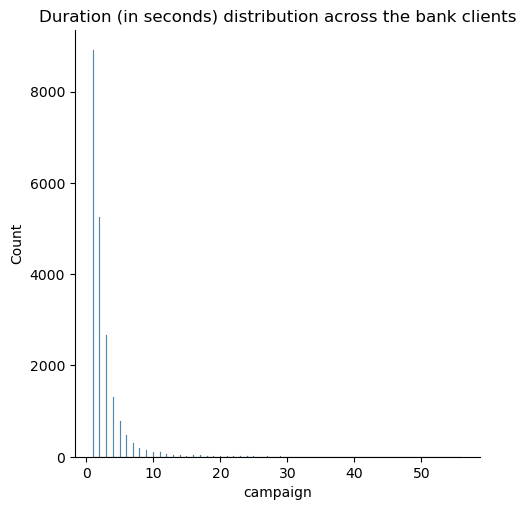

In [63]:
#campaign, pdays, previous, poutcomes
sns.displot(df.campaign, kind = 'hist')
plt.title('Duration (in seconds) distribution across the bank clients');

Output variable

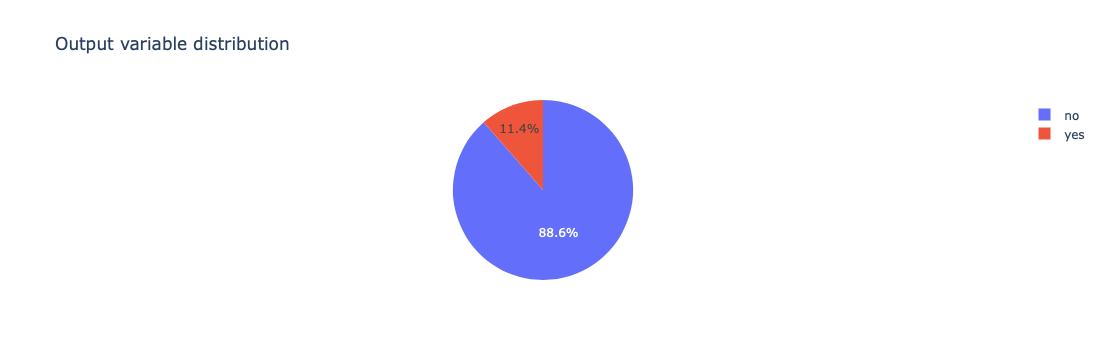

In [45]:
counts = df['y'].value_counts()

fig = px.pie(
    names=counts.index,  
    values=counts.values,
    title="Output variable distribution")
fig.show()

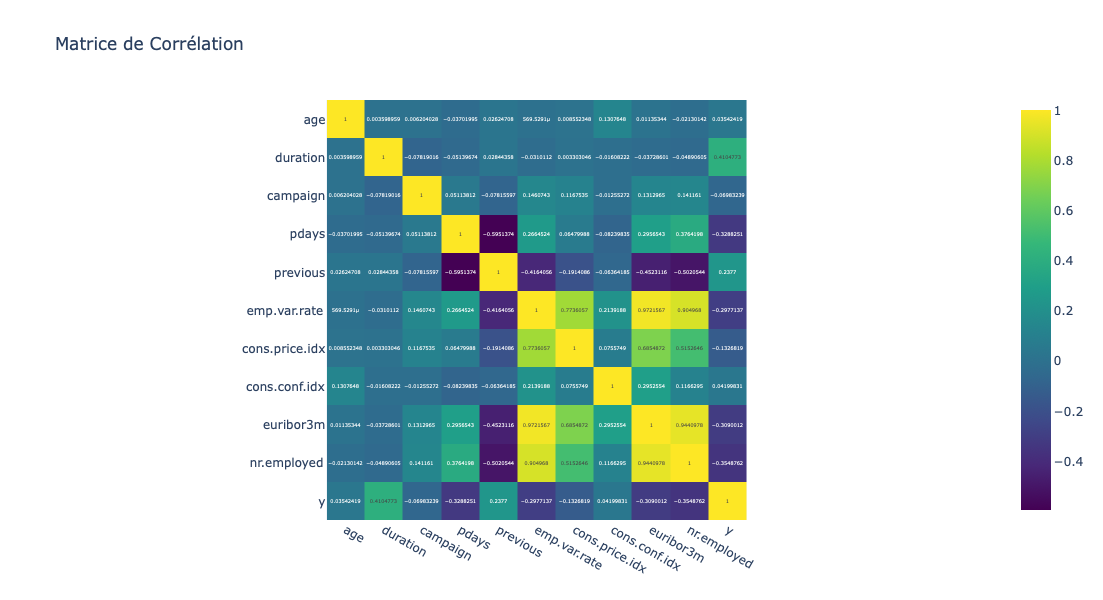

In [91]:
# Calcul de la matrice de corrélation
# selection variables numériques et de y
df['y'] = df['y'].replace(['no', 'yes'], [0,1])
df_num = df[df.columns[df.dtypes !='object']]
correlation_matrix = df_num.corr()

# Visualisation avec plotly.express
fig = px.imshow(
    correlation_matrix,
    text_auto=True,  # Affiche les coefficients dans les cellules
    color_continuous_scale='Viridis',  # Palette de couleurs
    title="Matrice de Corrélation"
)

# Ajuster la taille du graphique
fig.update_layout(
    width=800,  # Largeur
    height=600  # Hauteur
)
# Affichage
fig.show();